In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### MODELO IS-LM CON TASA DE INTERÉS EXÓGENA $(R)$ FIJADA POR EL BANCO CENTRAL:

#### 1. Nuevo esquema institucional de Política Monetaria: del Modelo IS-LM al Modelo IS-PM

#### 2. Ecuaciones:

- Ecuación de la IS: 

Partiendo de:

$$ Y = C + I + G + X - M $$

donde

$$ C = C_0 + b(1-t)Y $$

$$ I = I_0 - hr $$

$$ G = G_0 $$

$$ X = X_0 $$

$$ M = mY $$

La ecuación de la IS es en función de $Y$ es:

$$ Y = \frac{1}{1-b(1-t)+m} (C_0 + I_0 + X_0 - hr) $$


- Ecuación de la LM:

$$ \frac{M_o^s}{P_0} = kY - jr $$

En función de Y:

$$ Y = \frac{M_o^s + jr}{P_0 K} $$

#### 3. Gráfico:

In [184]:
#--------------------------------------------------
    # Curva IS

r_size = 100

Co = 15
b = 0.7
t = 0.25
Io = 7
Go = 8
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1-b*(1-t)+m))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)


#--------------------------------------------------
    # Curva LM
    
# Parámetros

Ms_size = 100

P = 9
k = 0.2
j = 0.5
r = 25

Ms = np.arange(Ms_size)


# Ecuación

def LM_CB(P, k, Ms, j, r):
    LM_CB = (Ms+j*r)/(P*k)
    return LM_CB

LM_CB = LM_CB(P, k, Ms, j, r)

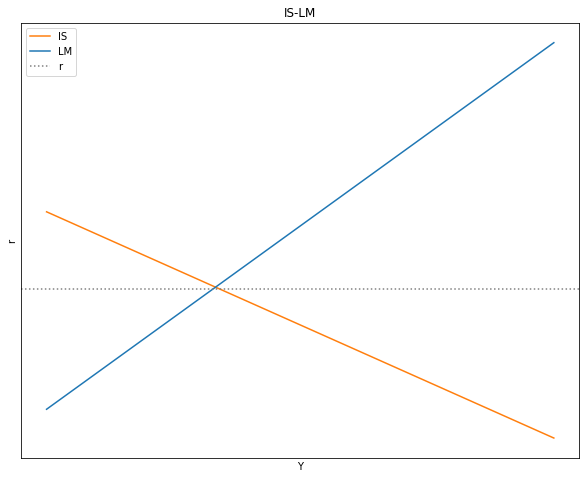

In [190]:
    # Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Ms)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1") #IS
ax.plot(LM_CB, label = "LM", color = "C0") #LM
ax.axhline(r, color = "grey", label = "r", linestyle = ':') #r: tasa de interés

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.set(title="IS-LM", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

#### 4. Estática comparativa:

#### - Incremento en el Gasto de Gobierno $(G_0)$:

In [186]:
#--------------------------------------------------
    # Curva IS

r_size = 100

Co = 15
b = 0.7
t = 0.25
Io = 7
Go = 8
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1-b*(1-t)+m))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)


#--------------------------------------------------
    # NUEVA curva IS

# Definir solo el NUEVO parámetro
Go = 13 

def IS_CB_G(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1-b*(1-t)+m))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB_G = IS_CB_G(Co, b, t, Io, h, Xo, m, Go)


#--------------------------------------------------
    # Curva LM
    
# Parámetros

Ms_size = 100

P = 9
k = 0.2
j = 0.5
r = 25

Ms = np.arange(Ms_size)

# Ecuación

def LM_CB(P, k, Ms, j, r):
    LM_CB = (Ms+j*r)/(P*k)
    return LM_CB

LM_CB = LM_CB(P, k, Ms, j, r)

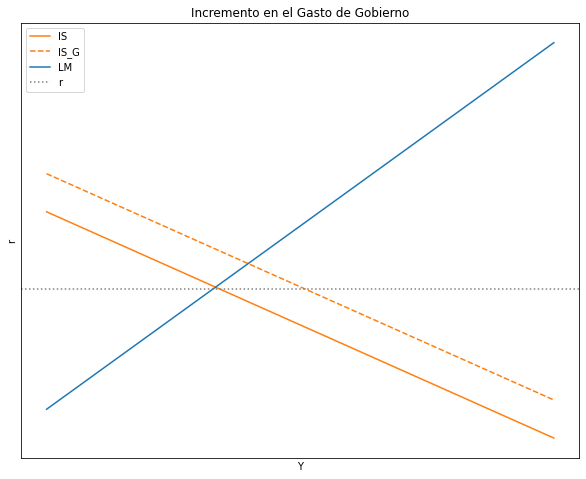

In [231]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1")
ax.plot(IS_CB_G, label = "IS_G", color = "C1", linestyle = 'dashed')
ax.plot(LM_CB, label = "LM", color = "C0")
ax.axhline(r, color = "grey", label = "r", linestyle = ':') #r: tasa de interés

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, leyenda y ejes
ax.set(title="Incremento en el Gasto de Gobierno", xlabel= 'Y', ylabel= 'r')

ax.legend()
plt.show()


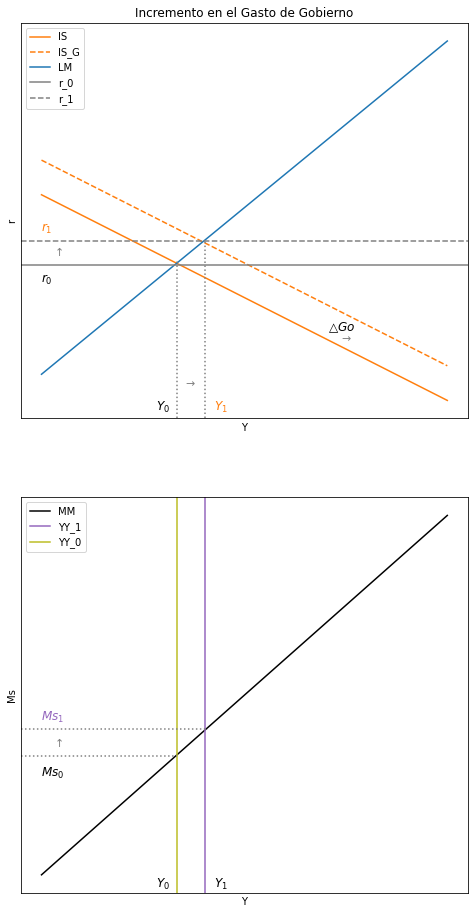

In [318]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # IS_PM

ax1.plot(IS_CB, label = "IS", color = "C1")
ax1.plot(IS_CB_G, label = "IS_G", color = "C1", linestyle = 'dashed')
ax1.plot(LM_CB, label = "LM", color = "C0")
ax1.axhline(r, color = "grey", label = "r_0") #r: tasa de interés
ax1.axhline(y = 29, color = "grey", label = "r_1", linestyle = 'dashed') #r: tasa de interés

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.axvline(x =40, color = "grey", linestyle =':', ymin = 0, ymax =0.45)
ax1.axvline(x =33, color = "grey", linestyle =':', ymin = 0, ymax =0.4)

ax1.text(70, 14, '$△Go$', fontsize = 12, color = 'black')
ax1.text(73, 12.5, '$→$', fontsize = 11, color = 'grey')
ax1.text(35, 5, '$→$', fontsize = 11, color = 'grey')
ax1.text(28, 1, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(42, 1, '$Y_1$', fontsize = 12, color = 'C1')
ax1.text(3, 26.5, '$↑$', fontsize = 11, color = 'grey')
ax1.text(0, 22, '$r_0$', fontsize = 12, color = 'black')
ax1.text(0, 30.5, '$r_1$', fontsize = 12, color = 'C1')

ax1.set(title="Incremento en el Gasto de Gobierno", xlabel= 'Y', ylabel= 'r')
ax1.legend()


#---------------------------------
    # YY-MM
    
ax2.plot(LM_CB, label = "MM", color = "black")

ax2.axvline(x =40, color = "C4", ymin = 0, ymax =1, label = 'YY_1')
ax2.axvline(x =33, color = "C8", ymin = 0, ymax =1, label = 'YY_0')

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())   

ax2.axhline(y =29.2, color = "grey", linestyle =':', xmin = 0, xmax =0.419)
ax2.axhline(y =25.2, color = "grey", linestyle =':', xmin = 0, xmax =0.35)

ax2.text(3, 26.5, '$↑$', fontsize = 11, color = 'grey')
ax2.text(28, 5, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(42, 5, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(0, 22, '$Ms_0$', fontsize = 12, color = 'black')
ax2.text(0, 30.5, '$Ms_1$', fontsize = 12, color = 'C4')

ax2.set(xlabel= 'Y', ylabel= 'Ms')
ax2.legend()

plt.show()
